In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = pd.read_csv("../Matplotlib/city_data.csv")
ride_data_to_load = pd.read_csv("../Matplotlib/ride_data.csv")

# Read the City and Ride Data
city_data_to_load.head()
ride_data_to_load.head()
# Combine the data into a single dataset
merged_data = pd.merge(city_data_to_load, ride_data_to_load, how="left", on=["city"])
merged_data.head(10)
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [2]:
#Average Fare ($) Per City
ByCity = merged_data.groupby('city')
AvgFarebyCity = ByCity['fare'].mean()
AvgFarebyCity.head(5)

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [3]:
#Total Number of Rides Per City
TotalRides = ByCity['ride_id'].count()
TotalRides.head(5)


city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [4]:
#Total Number of Drivers Per City
TotalDrivers = city_data_to_load.groupby('city')['driver_count'].sum()
TotalDrivers.head(5)


city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [5]:
City_Type = ByCity['type'].max()
City_Type.head(5)

city
Amandaburgh         Urban
Barajasview         Urban
Barronchester    Suburban
Bethanyland      Suburban
Bradshawfurt        Rural
Name: type, dtype: object

In [6]:
# Obtain the x and y coordinates for each of the three city types
# Create dataframe with results
Summarydf = pd.DataFrame({'Average Fare ($)': AvgFarebyCity,
                          'Total Number of Rides': TotalRides,
                          'Total Number of Drivers': TotalDrivers,
                          'City Type': City_Type})
# Urban
Urban = Summarydf.loc[Summarydf['City Type'] == 'Urban']
Avg_Fare_Urban = Urban['Average Fare ($)']
Total_Rides_Urban = Urban['Total Number of Rides']
Total_Drivers_Urban = Urban['Total Number of Drivers']

# Suburban
Suburban = Summarydf.loc[Summarydf['City Type'] == 'Suburban']
Avg_Fare_Suburban = Suburban['Average Fare ($)']
Total_Rides_Suburban = Suburban['Total Number of Rides']
Total_Drivers_Suburban = Suburban['Total Number of Drivers']

# Rural
Rural = Summarydf.loc[Summarydf['City Type'] == 'Rural']
Avg_Fare_Rural = Rural['Average Fare ($)']
Total_Rides_Rural = Rural['Total Number of Rides']
Total_Drivers_Rural = Rural['Total Number of Drivers']
Summarydf.head(5)

,Average Fare ($),Total Number of Rides,Total Number of Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


# Bubble Plot of Ride Sharing Data

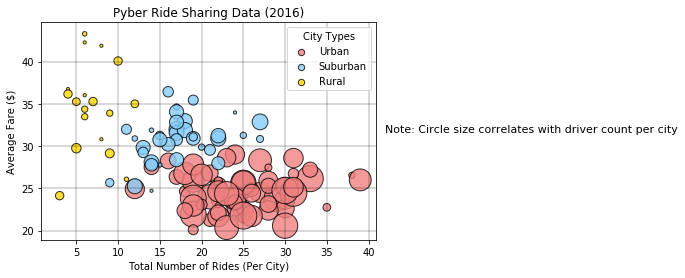

In [7]:
# Bubble Plot of Ride Sharing Data
# Build the scatter plots for each city types
plt.figure()
Urban_Plot = plt.scatter(Total_Rides_Urban, Avg_Fare_Urban, s=Total_Drivers_Urban*10, 
                         color='lightcoral', alpha=0.8, edgecolor='black', linewidths=1, 
                         label='Urban')
Suburban_Plot = plt.scatter(Total_Rides_Suburban, Avg_Fare_Suburban, s=Total_Drivers_Suburban*10, 
                            color='lightskyblue', alpha=0.8, edgecolor='black',linewidths=1, 
                            label='Suburban')
Rural_Plot = plt.scatter(Total_Rides_Rural, Avg_Fare_Rural, s=Total_Drivers_Rural*10, 
                         color='gold', alpha=0.8, edgecolor='black',linewidths=1, 
                         label='Rural')
# Create a legend 
lgnd = plt.legend(handles=[Urban_Plot,Suburban_Plot,Rural_Plot], loc ='best',title = 'City Types')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
# Incorporate a text label
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.figtext(1.60, 0.5,"Note: Circle size correlates with driver count per city", wrap=True,
            horizontalalignment='right', fontsize=11)

## Bubble Plot of Ride Sharing Data
# Show plot
plt.show()

# Total Fares by City Type

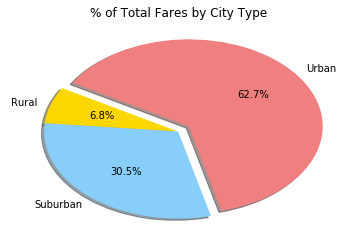

In [8]:
# Total Fares by City Type
ByCitydf = merged_data.groupby(['type'])
TotalFaresbyCitydf = ByCitydf['fare'].sum()
# Create pie chart
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(TotalFaresbyCitydf, explode=explode, labels=ByCitydf.groups, colors=colors, 
        autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

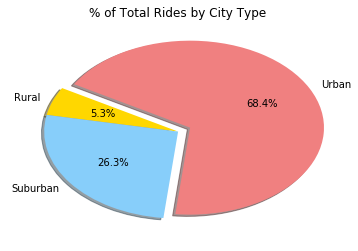

In [9]:
#Total Rides by city type
TotalRidesbyCitydf = ByCitydf['ride_id'].count()
# Create pie chart
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(TotalRidesbyCitydf, explode=explode, labels=ByCitydf.groups, colors=colors, 
        autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

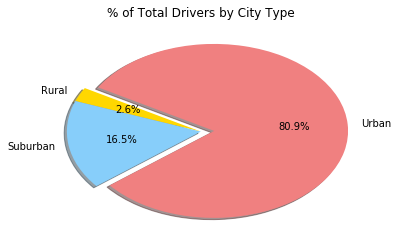

In [10]:
#Total Drivers by city type
Drivers_df = merged_data.drop_duplicates(['city'], keep='first')
Total_Driversdf= Drivers_df.groupby('type').sum()['driver_count']
# Create pie chart
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(Total_Driversdf, explode=explode, labels=ByCitydf.groups, colors=colors, 
        autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.show()


Three observable trends based on the data:
•	Urban cities have the highest number of rides 
•	Urban cities have more drivers per city
•	Rural cities have the highest fares 
